In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('reviews.csv')

In [3]:
# check for duplicates in id column
df['id'].duplicated().sum()

13

In [4]:
# list the duplicate ids
df[df['id'].duplicated()]['id']

616    R2YFM3DW9ZPKAV
626    R2RXKVD3AWSP2L
630    R3CLJT1O2XDK28
633    R1SU9GHKMF2PXN
635    R1PXSZE8MH4HCZ
638    R2J2XFTAAEL50V
641    R1MXD3GZKHTAKE
642    R33O38DNX0P4DD
880     R4P0HPOPSRECI
881    R366Y3EP4BFRMK
882     RUPX3V2E7K6B8
883     R5DM8A2UO2Z9N
884    R3SGPS32AFOG6R
Name: id, dtype: object

In [5]:
# drop duplicates
df.drop_duplicates(subset='id', inplace=True)

In [6]:
# view id R2YFM3DW9ZPKAV to see if it was dropped
df[df['id'] == 'R2YFM3DW9ZPKAV']

,id,title,body,asin,body_html,link,rating,vine_program,verified_purchase,helpful_votes,...,date.raw,date.utc,profile.name,profile.link,profile.id,profile.image,images,videos,attributes,attributes_flat
66,R2YFM3DW9ZPKAV,Good activity book,Cute pictures and great quality book,0593385691,<span>Cute pictures and great quality book</span>,https://www.amazon.ca/gp/customer-reviews/R2YF...,5,False,True,NaN,...,"Reviewed in Canada on March 26, 2024",2024-03-26T00:00:00.000Z,Magskywei,https://www.amazon.ca/gp/profile/amzn1.account...,AEB3ND3DRYZCTFEJK6YAX6UTB5HA,NaN,NaN,NaN,NaN,NaN


In [7]:
# check for null values in body column
df['body'].isnull().sum()

1

In [8]:
#check for null values in title column
df['title'].isnull().sum()

0

In [9]:
df['title_body'] = df['title'] + ' ' + df['body']

In [10]:
# string
docs = df['title_body'].astype(str).tolist()

Preprocessing with SPACY

In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [12]:
# tokenize
docs = [nlp(doc) for doc in docs]

In [13]:
# stop words
from spacy.lang.en.stop_words import STOP_WORDS

# remove stop words
docs = [[token for token in doc if not token.is_stop] for doc in docs]

In [14]:
# lemmatize
docs = [[token.lemma_ for token in doc] for doc in docs]

In [15]:
# remove punctuation and non-alphabetic characters
docs = [[token for token in doc if token.isalpha] for doc in docs]

In [16]:
# lower case
docs = [[token.lower() for token in doc] for doc in docs]

In [17]:
# docs to list of strings
docs = [' '.join(doc) for doc in docs]

In [18]:
from top2vec import Top2Vec
import tensorflow_hub as hub
import os
import numpy as np

In [19]:
import shutil

# Delete the existing tfhub_modules directory
# shutil.rmtree('/var/folders/r9/1bkv53y17nx4nlgj5txfvv800000gn/T/tfhub_modules/063d866c06683311b44b4992fd46003be952409c')

# Load the model again
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

In [20]:
# intialize and train the model
top2vec_model = Top2Vec(documents=docs, embedding_model=model, speed='deep learn', workers=os.cpu_count())

2024-06-11 19:19:49,337 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/Users/grahammarsh/Documents/GitHub/project4/venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-06-11 19:19:49,420 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-06-11 19:19:49,833 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2024-06-11 19:19:53,807 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-06-11 19:19:53,827 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [21]:
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
print(topic_sizes)

[807  67]


In [22]:
print(topic_nums)

[0 1]


In [23]:
topic_words, word_scores, topic_nums = top2vec_model.get_topics()

In [24]:
# print the topics
for topic in topic_words:
    print(topic)

['book' 'novel' 'read' 'good' 'write' 'recommend' 'writing' 'romance'
 'reader' 'great' 'fun' 'amazing' 'enjoy' 'love' 'beautiful' 'review'
 'interesting' 'becky' 'understand' 'series' 'story' 'fantasy' 'chapter'
 'definitely' 'get' 'gift' 'buy' 'perfect' 'learn' 'plot' 'long' 'recipe'
 'slow' 'easy' 'character' 'moment' 'absolutely' 'well' 'lot' 'highly'
 'sure' 'twist' 'start' 'author' 'hope' 'keep' 'find' 'little' 'tell'
 'wait']
['gluten' 'recipe' 'becky' 'book' 'louise' 'make' 'easy' 'recommend'
 'start' 'maas' 'review' 'writing' 'need' 'like' 'perfect' 'main'
 'absolutely' 'enjoy' 'fae' 'find' 'novel' 'good' 'learn' 'great' 'write'
 'want' 'moment' 'year' 'know' 'buy' 'sure' 'second' 'help' 'take' 'get'
 'family' 'twist' 'sarah' 'change' 'definitely' 'free' 'love' 'actually'
 'fall' 'try' 'rhys' 'romance' 'series' 'well' 'follow']


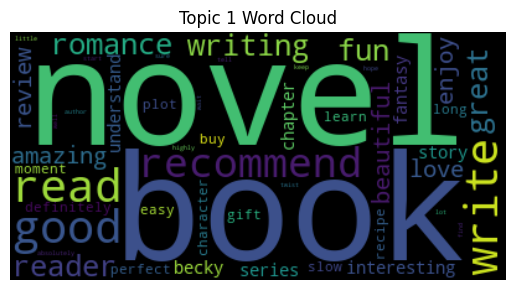

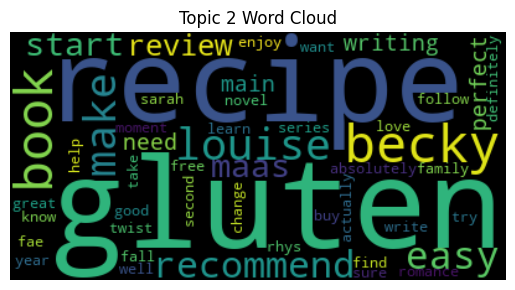

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Get the top words for each topic
topic_words, _, _ = top2vec_model.get_topics()

# Generate word clouds for each topic
for i, words in enumerate(topic_words):
    wordcloud = WordCloud().generate(' '.join(words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i+1} Word Cloud')
    plt.show()

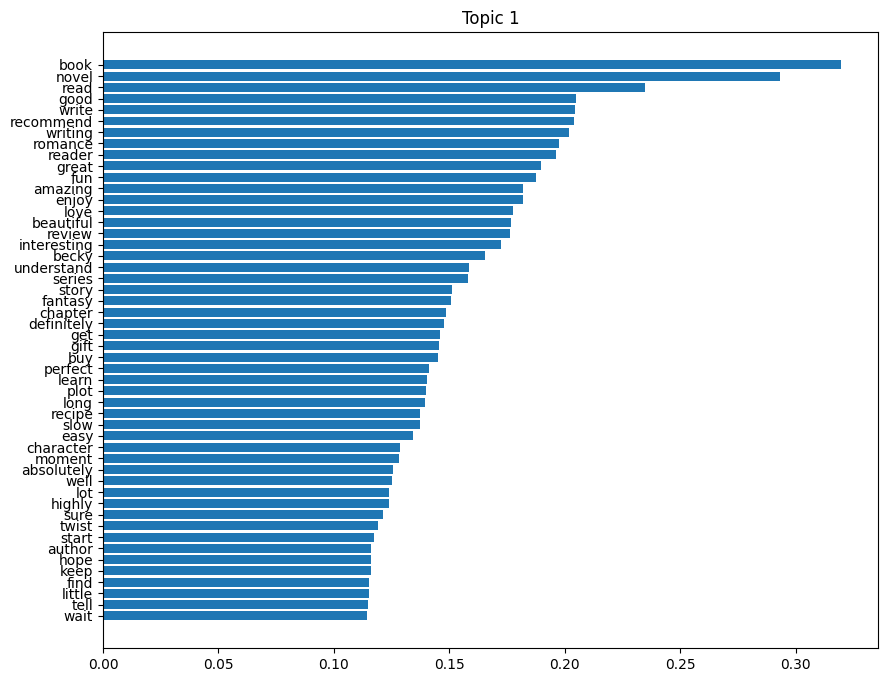

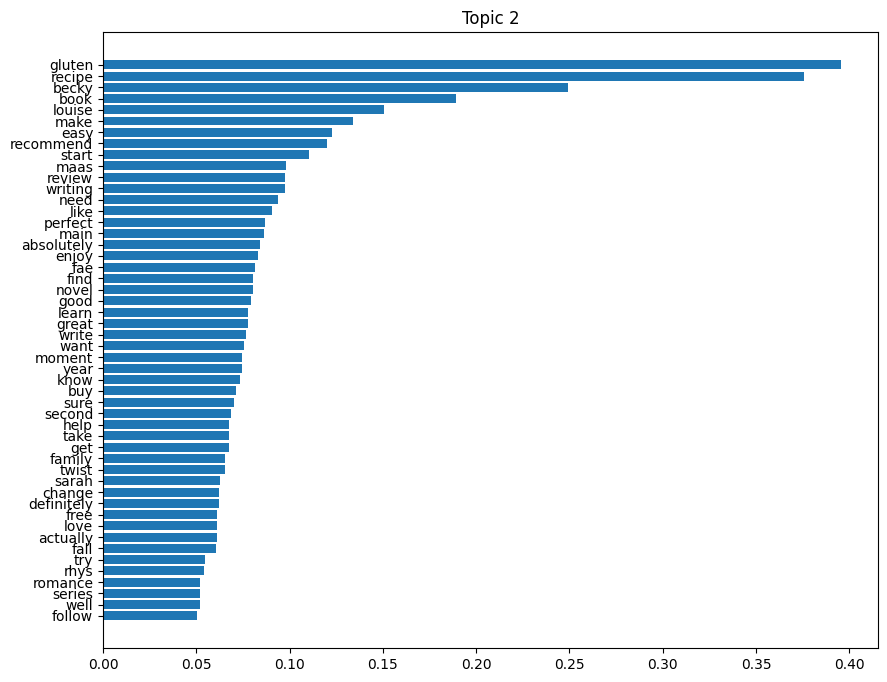

In [26]:
import numpy as np

# horizontal bar chart by topics and their words
topic_words, word_scores, topic_nums = top2vec_model.get_topics()
for i, words in enumerate(topic_words):
    scores = word_scores[i]
    
    # sort the scores 
    indices = np.argsort(scores)[::1]
    
    # Use the indices to sort words and scores
    sorted_words = words[indices]
    sorted_scores = scores[indices]
    
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_words, sorted_scores)  # Use sorted words and scores
    plt.title(f'Topic {i+1}')
    plt.show()

Evaluation

In [27]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [31]:
# coherence score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Top2Vec model
topic_words, _, _ = top2vec_model.get_topics(top2vec_model.get_num_topics())

# Gensim dictionary from the topic words
dictionary = Dictionary(topic_words)

# Gensim corpus from the topic words
corpus = [dictionary.doc2bow(words) for words in topic_words]

# CoherenceModel
coherence_model = CoherenceModel(topics=topic_words, texts=topic_words, dictionary=dictionary, coherence='c_v')

# Get the coherence score
coherence = coherence_model.get_coherence()
print(coherence)

0.7256803830402787
